In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("data_car.csv")
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
data.duplicated().sum()

715

In [6]:
data=data.drop_duplicates()
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [11]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,11199,48,Chevrolet,1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,11199,915,Silverado 1500,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,11199.0,NaN,NaN,NaN,2010.714528,7.228211,1990.0,2007.0,2015.0,2016.0,2017.0
Engine Fuel Type,11196,10,regular unleaded,6658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine HP,11130.0,NaN,NaN,NaN,253.388859,110.150938,55.0,172.0,239.0,303.0,1001.0
Engine Cylinders,11169.0,NaN,NaN,NaN,5.66595,1.797021,0.0,4.0,6.0,6.0,16.0
Transmission Type,11199,5,AUTOMATIC,7932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driven_Wheels,11199,4,front wheel drive,4354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Doors,11193.0,NaN,NaN,NaN,3.454123,0.872946,2.0,2.0,4.0,4.0,4.0
Market Category,7823,71,Crossover,1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

The colunms Engine Fuel Type,Engine HP,Engine Cylinders,Number of Doors,Market Category have null values.So we need to fill null values using fillna().

In [18]:
for i in data.columns:
    print(i)
    print(data[i].unique())

Make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
Model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti' '62

In [21]:
data["Market Category"].value_counts()

Crossover                                          1075
Flex Fuel                                           855
Luxury                                              819
Luxury,Performance                                  659
Hatchback                                           574
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: Market Category, Length: 71, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11196 non-null  object 
 4   Engine HP          11130 non-null  float64
 5   Engine Cylinders   11169 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Market Category    7823 non-null   object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5

Filling Null Values

In [27]:
for i in ['Engine HP','Engine Cylinders','Number of Doors']:
    data[i]=data[i].fillna(data[i].median())

In [34]:
for i in ['Engine Fuel Type','Market Category']:
    data[i]=data[i].fillna(data[i].mode()[0])

In [35]:
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

Converting Data Type

In [37]:
for i in ['Engine HP','Engine Cylinders','Number of Doors']:
    data[i]=data[i].astype('int64')

Univariate Analysis

In [41]:
numeric=['Engine HP','highway MPG','city mpg']
numeric

['Engine HP', 'highway MPG', 'city mpg']

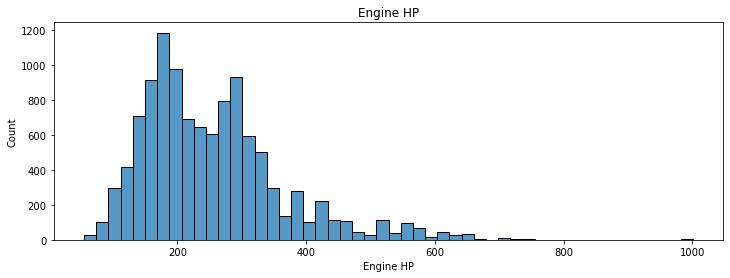

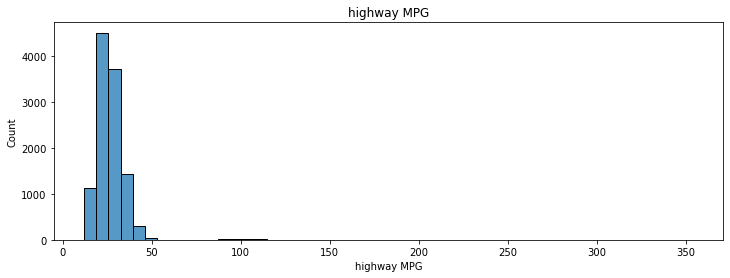

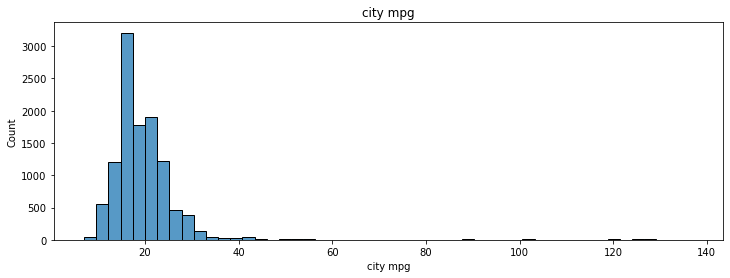

In [42]:
for i in numeric:
    plt.figure(figsize=(12,4))
    sns.histplot(data[i],bins=50)
    plt.title(i)
    plt.show()

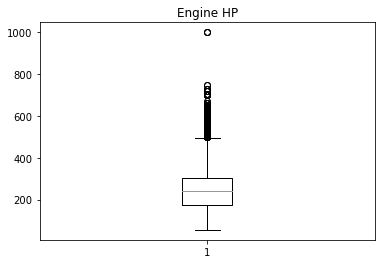

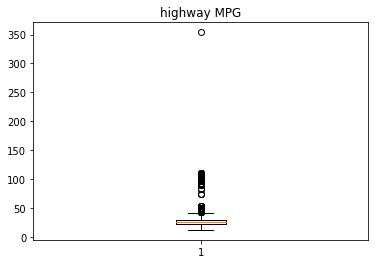

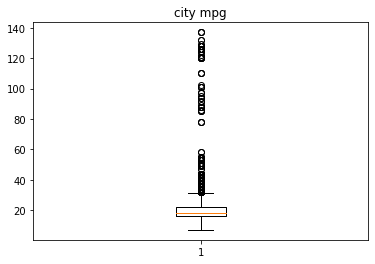

In [46]:
for i in numeric:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

The columns Engine HP,highway MPG,city mpg have outliers,so we need to fit outliers.

In [45]:
discrete=[feature for feature in data.columns if feature not in numeric and feature != 'MSRP' and data[feature].nunique()<100]
discrete

['Make',
 'Year',
 'Engine Fuel Type',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style',
 'Popularity']

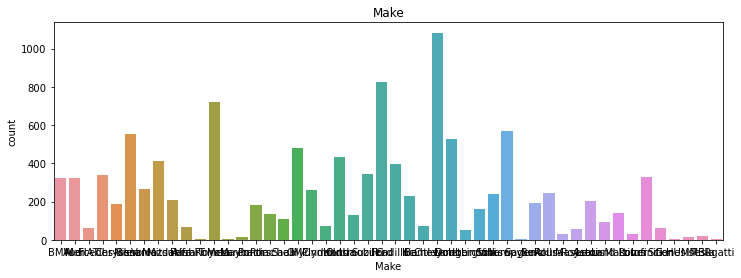

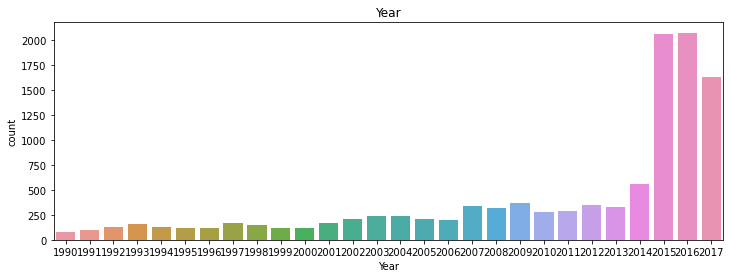

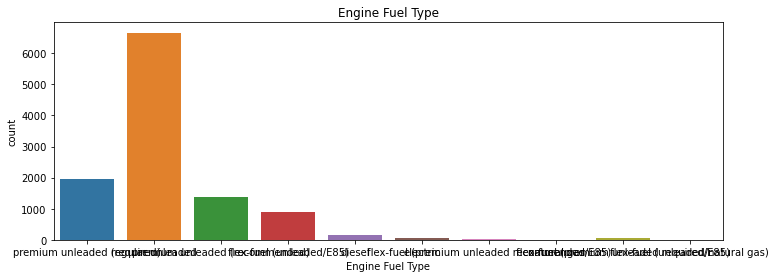

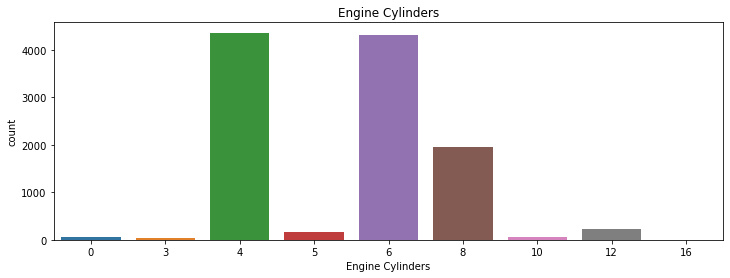

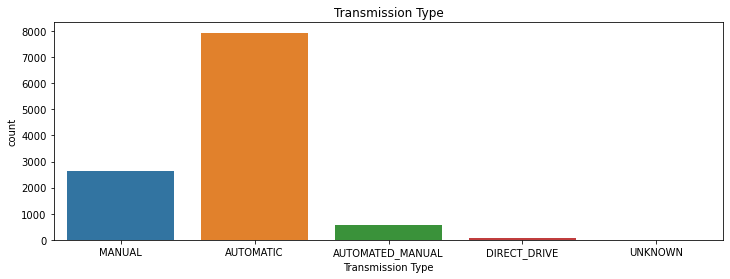

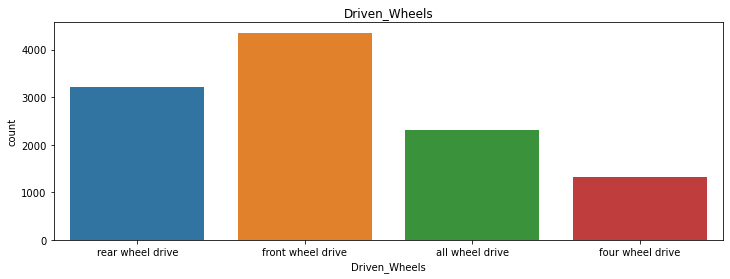

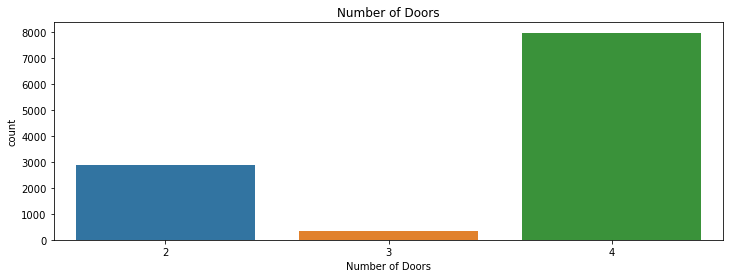

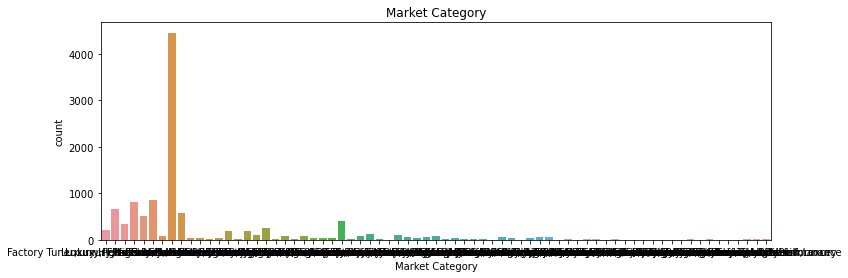

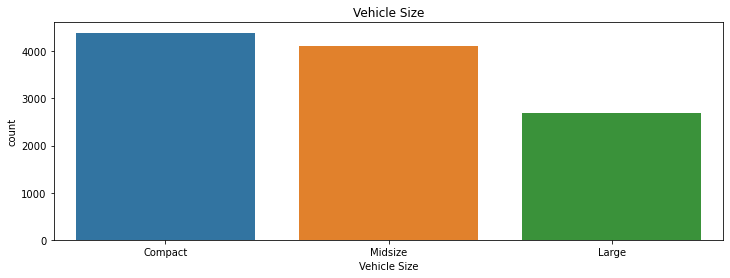

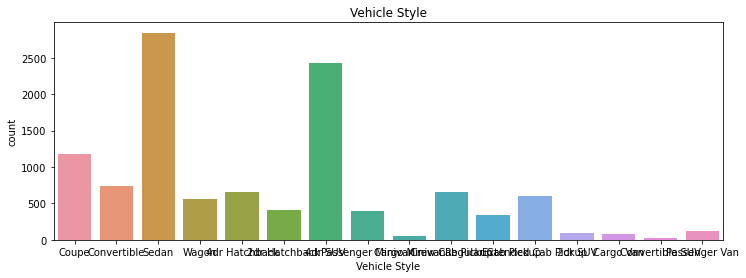

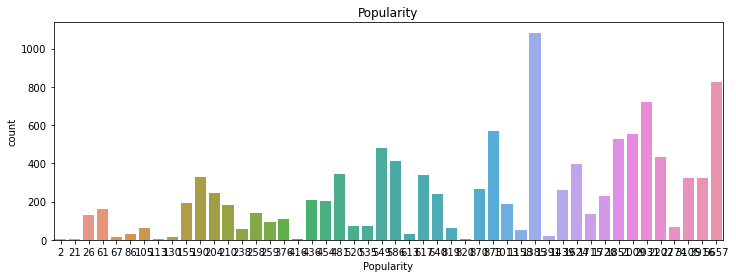

In [47]:
for i in discrete:
    plt.figure(figsize=(12,4))
    sns.countplot(x=i,data=data)
    plt.title(i)
    plt.show()

Multivariate analysis

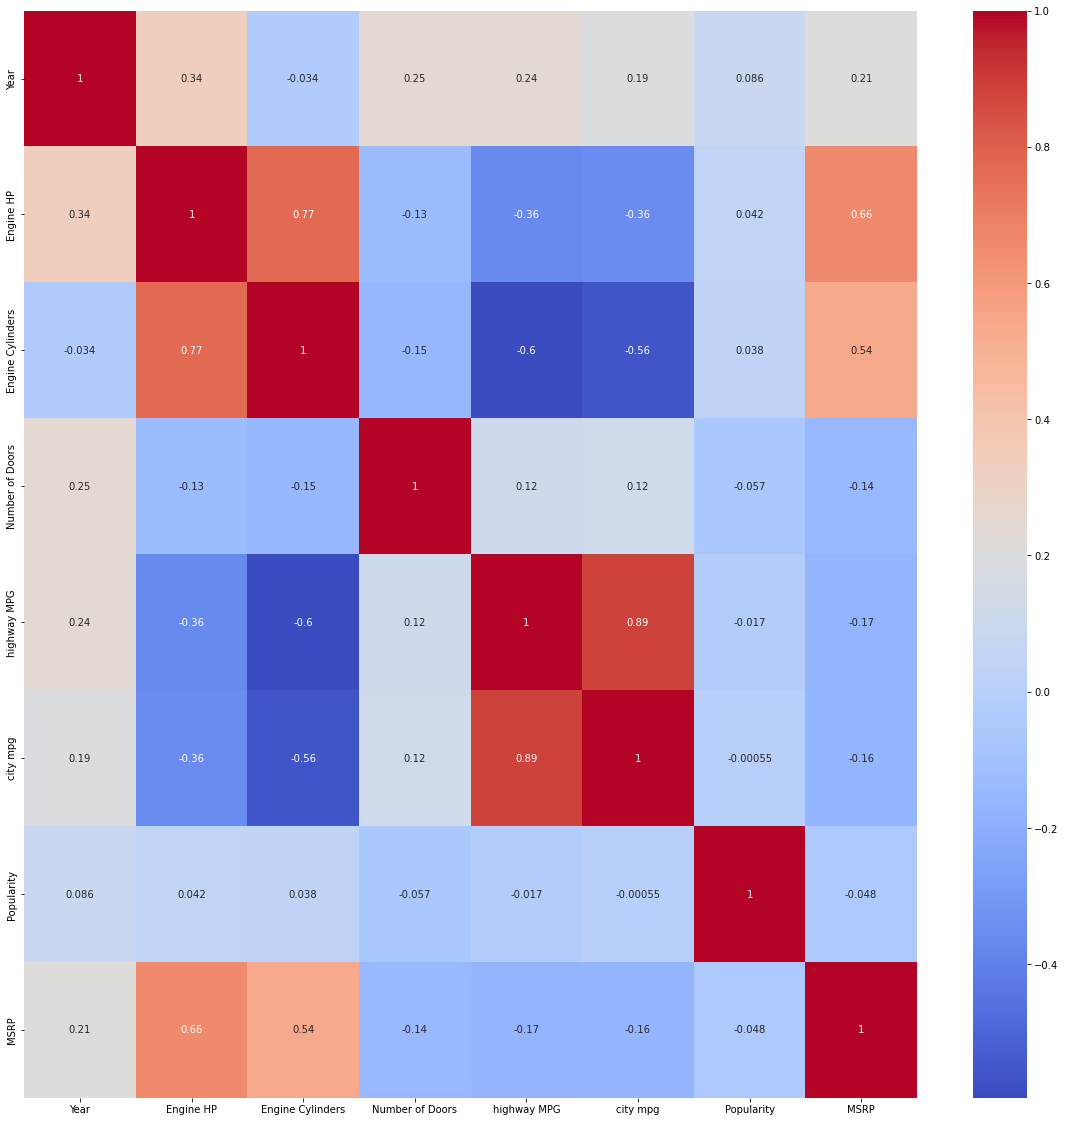

In [49]:
correlation=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()

The columns Year, Engine HP , Engine Cylinder are positivly correlated with the target column MSRP

# PreProcessing

Outliers Fitting

In [52]:
for i in numeric:   
    q1=np.percentile(data[i],25,interpolation='midpoint')
    q2=np.percentile(data[i],50,interpolation='midpoint')
    q3=np.percentile(data[i],75,interpolation='midpoint')
    iqr=q3-q1
    min_limit=q1-1.5*iqr
    max_limit=q3+1.5*iqr
    outlier=[]
    for x in data[i]:
        if((x>max_limit) or (x<min_limit)):
            outlier.append(x)
    print(outlier)
    data.loc[data[i]>max_limit,i]=np.median(data[i])
    data.loc[data[i]<min_limit,i]=np.median(data[i])
    print("Outliers in ",i," column is removed")

[562, 562, 562, 597, 562, 562, 562, 597, 562, 515, 515, 515, 515, 515, 515, 543, 631, 604, 543, 620, 543, 620, 611, 611, 611, 611, 661, 532, 532, 532, 604, 543, 631, 543, 620, 620, 543, 641, 641, 535, 520, 520, 560, 560, 520, 560, 520, 560, 500, 540, 580, 540, 580, 500, 540, 600, 600, 540, 540, 540, 540, 540, 540, 540, 540, 600, 503, 503, 500, 500, 500, 500, 700, 700, 720, 720, 700, 700, 720, 720, 700, 750, 750, 700, 500, 530, 530, 503, 503, 503, 503, 553, 580, 505, 580, 650, 650, 605, 605, 520, 520, 570, 520, 570, 707, 707, 707, 707, 707, 707, 621, 510, 536, 621, 536, 510, 621, 510, 536, 500, 577, 577, 577, 600, 600, 600, 552, 552, 552, 626, 600, 616, 572, 500, 521, 567, 626, 626, 567, 521, 500, 500, 567, 521, 521, 500, 500, 626, 582, 582, 521, 626, 600, 600, 567, 567, 500, 500, 567, 521, 621, 621, 621, 621, 621, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 556, 556, 556, 556, 556, 556, 556, 640, 640, 563, 540, 540, 540, 510, 510, 510, 510,

Scaling

In [54]:
from  sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
for i in numeric:
    data[i]=scale.fit_transform(data[[i]])

In [55]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),0.639269,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,0.466667,0.500000,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),0.559361,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,0.533333,0.500000,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),0.559361,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,0.533333,0.541667,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),0.399543,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,0.533333,0.458333,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),0.399543,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,0.533333,0.458333,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),0.559361,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,0.366667,0.375000,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),0.559361,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,0.366667,0.375000,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),0.559361,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,0.366667,0.375000,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),0.559361,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,0.366667,0.375000,204,50920


Label Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Make']=le.fit_transform(data['Make'])
data['Model']=le.fit_transform(data['Model'])
data['Year']=le.fit_transform(data['Year'])
data['Engine Fuel Type']=le.fit_transform(data['Engine Fuel Type'])
data['Transmission Type']=le.fit_transform(data['Transmission Type'])
data['Driven_Wheels']=le.fit_transform(data['Driven_Wheels'])
data['Market Category']=le.fit_transform(data['Market Category'])
data['Vehicle Size']=le.fit_transform(data['Vehicle Size'])
data['Vehicle Style']=le.fit_transform(data['Vehicle Style'])

In [59]:
data['Popularity']=le.fit_transform(data['Popularity'])

In [60]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,21,8,0.639269,6,3,3,2,38,0,8,0.466667,0.500000,46,46135
1,4,0,21,8,0.559361,6,3,3,2,67,0,6,0.533333,0.500000,46,40650
2,4,0,21,8,0.559361,6,3,3,2,64,0,8,0.533333,0.541667,46,36350
3,4,0,21,8,0.399543,6,3,3,2,67,0,8,0.533333,0.458333,46,29450
4,4,0,21,8,0.399543,6,3,3,2,63,0,6,0.533333,0.458333,46,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,901,22,8,0.559361,6,1,0,4,13,2,2,0.366667,0.375000,11,46120
11910,0,901,22,8,0.559361,6,1,0,4,13,2,2,0.366667,0.375000,11,56670
11911,0,901,22,8,0.559361,6,1,0,4,13,2,2,0.366667,0.375000,11,50620
11912,0,901,23,7,0.559361,6,1,0,4,13,2,2,0.366667,0.375000,11,50920


# Model Fitting

In [65]:
X=data.drop('MSRP',axis=1)
Y=data['MSRP']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from lightgbm import LGBMRegressor

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [63]:
models={
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression":Lasso(),
    "XG Boost Regressor":XGBRegressor(),
    "XG Boost RF Regressor":XGBRFRegressor(),
    "Neural Network":MLPRegressor(),
    "CatBoost Regressor":CatBoostRegressor(verbose=0),
    "Random Forest":RandomForestRegressor(),
    "Light Gradient Boost":LGBMRegressor()
}

In [68]:
for name,model in models.items():
    model.fit(xtrain,ytrain)
    print(name +" trained")
    y_pred=model.predict(xtest)
    mse=mean_squared_error(ytest,y_pred)
    rmse=np.sqrt(mse)
    print(name+" RMSE: {:.2f}".format(rmse))     

Linear Regression trained
Linear Regression RMSE: 56485.89
Ridge Regression trained
Ridge Regression RMSE: 56487.50
Lasso Regression trained
Lasso Regression RMSE: 56486.65
XG Boost Regressor trained
XG Boost Regressor RMSE: 14097.17
XG Boost RF Regressor trained
XG Boost RF Regressor RMSE: 20116.14
Neural Network trained
Neural Network RMSE: 65801.00
CatBoost Regressor trained
CatBoost Regressor RMSE: 11515.05
Random Forest trained
Random Forest RMSE: 20468.67
Light Gradient Boost trained
Light Gradient Boost RMSE: 34373.94


HyperParameter Tuning

In [72]:
#Hyperparameter Tuning using RandomizedSearchCV and GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
params = {
    'n_estimators':[500],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)]
}
xgbr = XGBRegressor(nthread=-1)
# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(xgbr, param_distributions=params,n_iter=n_iter_search, cv=5,scoring='neg_mean_squared_error')
start = time.time()
random_search.fit(xtrain,ytrain)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
#RandomizedSearchCV took 45.98 seconds for 100 candidates parameter settings.
best_regressor = random_search.best_estimator_
xgbr = XGBRegressor()
xgbr.fit(xtrain,ytrain)
y_pred1=best_regressor.predict(xtrain)
rmse_pred = mean_absolute_error(ytrain, y_pred1) 
print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))
# Get predictions of validation set
y_val_pred1 = best_regressor.predict(X_val)
# Calculate MAE
rmse_pred = mean_absolute_error(y_val, y_val_pred1) 
print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))
y_test_pred1 = best_regressor.predict(X_test)
rmse_pred = mean_absolute_error(y_test, y_test_pred1) 
print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))



KeyboardInterrupt



Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
model_CBR = CatBoostRegressor()
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }
grid = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(xtrain, ytrain)


In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)